In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.ExcelFile('raw_data_analysed.xlsx') # setting up data reading
N_sites= raw_data.sheet_names


# setting up databases list so can grab glycan classifications and mods

classi_list = ['Oligomannose', 'Hybrid', 'Complex', 'Unoccupied', 'Core']
mod_list = ['Fucose', 'NeuAc/NeuGc']

data = pd.DataFrame(index = N_sites, columns = classi_list + mod_list)

# following code strips the classifications and modifications from the 
# main spreadsheet, puts it in a nice table

for N_site in N_sites: # read each sheet name which is an N-glycosite
    glycosite = pd.read_excel(raw_data,sheet_name = N_site)
    for classification in classi_list: 
        data[classification][N_site] = glycosite[classification][0]
    for modification in mod_list:
        data[modification][N_site] = glycosite[modification][0]
        
data

,Oligomannose,Hybrid,Complex,Unoccupied,Core,Fucose,NeuAc/NeuGc
N88,5.54,0,94.18,0.28,0,10.05,3.16
N156,100,0,0,0,0,0,0
N160,100,0,0,0,0,0,0
N185e,0,0,100,0,0,100,0
N197,87.56,0.76,9.41,2.28,0,8.37,0
N295,100,0,0,0,0,0,0
N332,100,0,0,0,0,0,0
N339,93.5,0,0,6.23,0.26,0,0
N355,12.15,0,77.64,0,10.21,77.64,1.03
N386,100,0,0,0,0,0,0


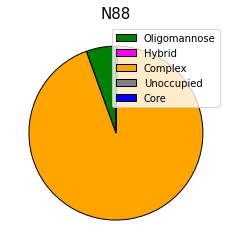

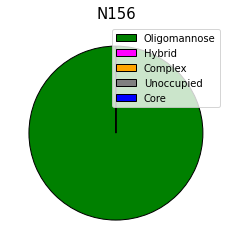

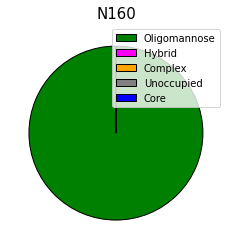

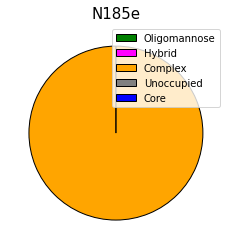

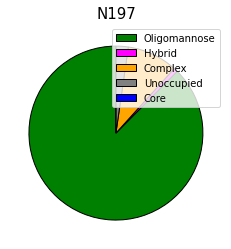

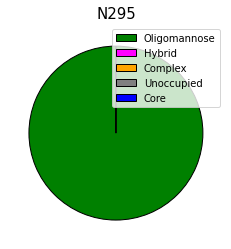

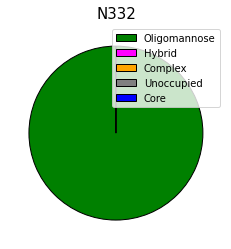

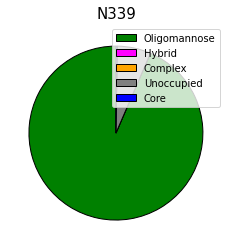

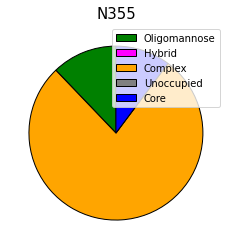

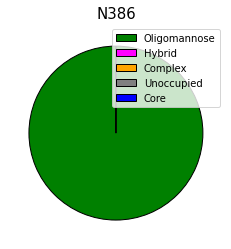

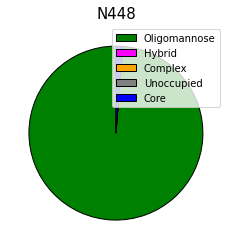

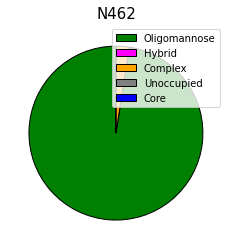

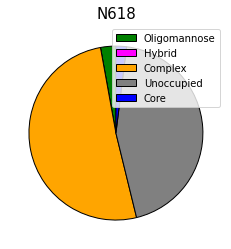

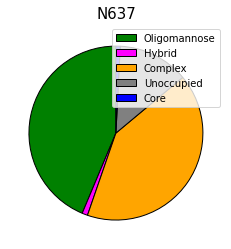

In [12]:
# Creating figures (pie charts?)

colour_list = ['green', 'magenta', 'orange', 'grey', 'blue']

# get the data out for each N_site into a list

for N_site in N_sites:
    occu = []
    for classification in classi_list:
        item = data[classification][N_site]
        occu.append(item)
    
    # plug the list into a pie chart generator, not sure yet if I want to keep the legends, as we'll need
    # at least one for the figure
    
    fig = plt.gca()
    plt.pie(occu, startangle=90, colors = colour_list, wedgeprops = {'edgecolor':'black'})
    plt.legend(classi_list, loc = 'upper right')
    plt.title(str(N_site), fontsize = 15)
    file_str = 'pie_charts/' + str(N_site) + '_pie_chart'
    plt.savefig(file_str + '.png')
    plt.savefig(file_str + '.svg')
    plt.show()  

      Oligomannose Hybrid Complex Unoccupied   Core Fucose NeuAc/NeuGc
N88           5.54      0   94.18       0.28      0  10.05        3.16
N156           100      0       0          0      0      0           0
N160           100      0       0          0      0      0           0
N185e            0      0     100          0      0    100           0
N197         87.56   0.76    9.41       2.28      0   8.37           0
N295           100      0       0          0      0      0           0
N332           100      0       0          0      0      0           0
N339          93.5      0       0       6.23   0.26      0           0
N355         12.15      0   77.64          0  10.21  77.64        1.03
N386           100      0       0          0      0      0           0
N448         98.74      0       0          0   1.26      0           0
N462         97.53      0    2.47          0      0      0           0
N618          2.85      0   50.97      44.23   1.95  49.95        0.51
N637  